<a href="https://colab.research.google.com/github/MathieuFan22/TP-ML-Mirada/blob/Partie-C/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd

# Lire le fichier CSV
df = pd.read_csv('diabetes.csv')

# Afficher les premi√®res lignes
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
import numpy as np

cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


# Remplacer les z√©ros par NaN dans les colonnes concern√©es
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)

# V√©rifier le nombre de valeurs manquantes
df.isnull().sum()

# Remplacer les NaN par la m√©diane des colonnes
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].fillna(df[cols_with_invalid_zeros].median())

from sklearn.preprocessing import StandardScaler

# S√©parer les features (X) et la cible (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Appliquer la standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir X_scaled en DataFrame pour garder les noms de colonnes
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# V√©rification
X_scaled.head()





Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

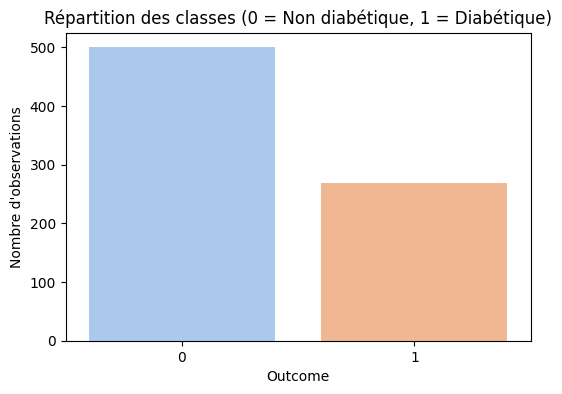

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

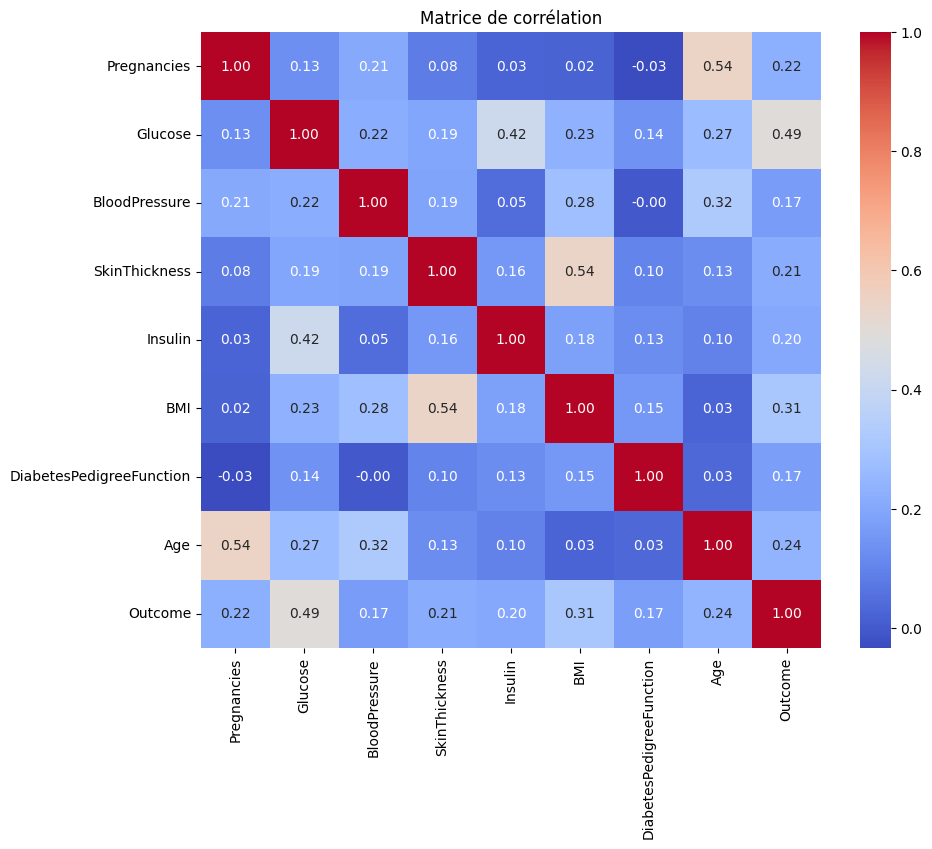

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Taille du graphique
plt.figure(figsize=(6, 4))

# Barplot du nombre de 0 et 1 sans warning
sns.countplot(x='Outcome', data=df, hue='Outcome', palette='pastel', legend=False)

# Ajout des annotations
plt.title('R√©partition des classes (0 = Non diab√©tique, 1 = Diab√©tique)')
plt.xlabel('Outcome')
plt.ylabel('Nombre d\'observations')

plt.show()

# Statistiques g√©n√©rales
print(df.describe())

# Statistiques par classe de Outcome
print(df.groupby('Outcome').mean())

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corr√©lation')
plt.show()






In [13]:
from sklearn.model_selection import train_test_split

# √âtape 1 : Split en 80% (train+val) et 20% (test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# √âtape 2 : Split les 80% restants en 60% train et 20% val
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)
# (0.25 * 80% = 20%)

# V√©rification des tailles
print(f"Train: {X_train.shape[0]} √©chantillons")
print(f"Validation: {X_val.shape[0]} √©chantillons")
print(f"Test: {X_test.shape[0]} √©chantillons")


Train: 460 √©chantillons
Validation: 154 √©chantillons
Test: 154 √©chantillons


In [26]:
X_scaled.dtypes

# Ajouter temporairement Outcome pour corr√©lation
Xy = X_scaled.copy()
Xy['Outcome'] = y

# Corr√©lation avec la cible
correlations = Xy.corr()['Outcome'].drop('Outcome').sort_values(ascending=False)
print(correlations)






Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64


In [19]:
y_train.value_counts(normalize=True)

from imblearn.over_sampling import SMOTE

# Appliquer SMOTE uniquement sur les donn√©es d'entra√Ænement
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# V√©rification du nouvel √©quilibre
from collections import Counter
print("Distribution apr√®s SMOTE :", Counter(y_train_resampled))




Distribution apr√®s SMOTE : Counter({0: 300, 1: 300})


Accuracy : 0.7597
Precision: 0.6441
Recall   : 0.7037
F1-score : 0.6726


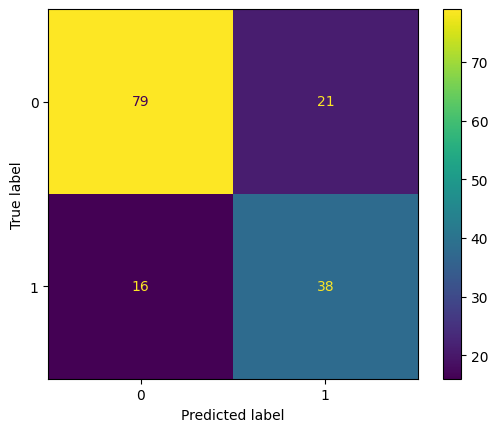

In [23]:
from sklearn.linear_model import LogisticRegression

# Cr√©er et entra√Æner le mod√®le avec pond√©ration des classes
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Pr√©dictions sur les donn√©es de validation
y_val_pred = model.predict(X_val)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcul des m√©triques
acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred)
rec = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Affichage
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()





√âvaluation finale sur le jeu de test :
Accuracy : 0.7273
Precision: 0.5968
Recall   : 0.6852
F1-score : 0.6379


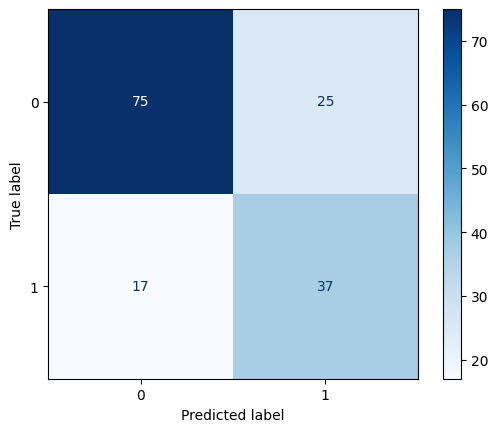

In [29]:
# Pr√©dictions finales sur les donn√©es de test
y_test_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcul des m√©triques
acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Affichage
print("√âvaluation finale sur le jeu de test :")
print(f"Accuracy : {acc_test:.4f}")
print(f"Precision: {prec_test:.4f}")
print(f"Recall   : {rec_test:.4f}")
print(f"F1-score : {f1_test:.4f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matrice de confusion
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap='Blues')






üîç Importance des variables (r√©gression logistique) :
                    Feature  Coefficient
1                   Glucose     1.257015
5                       BMI     0.802034
6  DiabetesPedigreeFunction     0.341214
0               Pregnancies     0.299692
7                       Age     0.185803
2             BloodPressure    -0.147238
4                   Insulin    -0.093884
3             SkinThickness    -0.091639


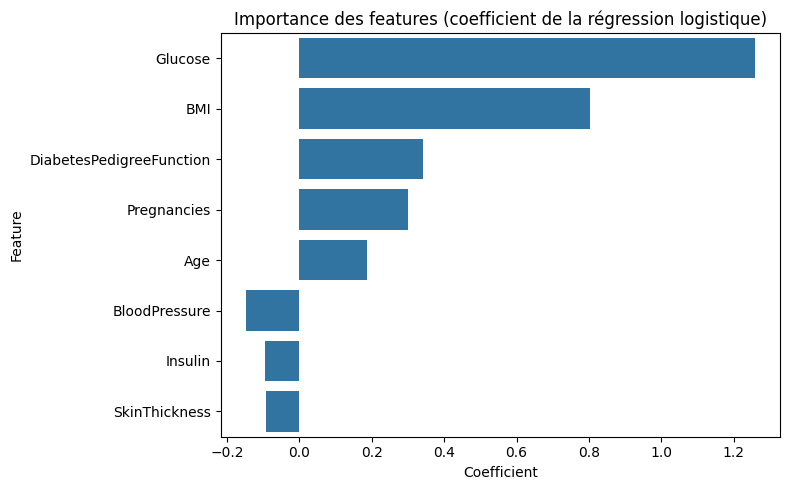

Vrais n√©gatifs : 75
Faux positifs  : 25
Faux n√©gatifs  : 17
Vrais positifs : 37


In [39]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# R√©cup√©ration des noms et coefficients
coefficients = model.coef_[0]
features = X_train.columns

# Cr√©ation d‚Äôun DataFrame pour trier
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})
coef_df['AbsCoef'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='AbsCoef', ascending=False)

# Affichage
print("üîç Importance des variables (r√©gression logistique) :")
print(coef_df[['Feature', 'Coefficient']])

plt.figure(figsize=(8, 5))
# Suppression de palette pour √©viter le warning
sns.barplot(data=coef_df, y='Feature', x='Coefficient')
plt.title("Importance des features (coefficient de la r√©gression logistique)")
plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()

print(f"Vrais n√©gatifs : {tn}")
print(f"Faux positifs  : {fp}")
print(f"Faux n√©gatifs  : {fn}")
print(f"Vrais positifs : {tp}")





In [36]:
 # Conclusion

 print("""Le mod√®le de r√©gression logistique offre de bonnes performances pour pr√©dire le diab√®te.

La gestion du d√©s√©quilibre des classes a am√©lior√© la d√©tection des cas positifs.

Variables cl√©s influentes : glyc√©mie (Glucose), BMI, √¢ge.

Limites : taille r√©duite du dataset et risque de faux n√©gatifs.

Recommandations pour le d√©ploiement :

Utiliser comme outil d‚Äôaide √† la d√©cision, pas comme diagnostic unique.

Suivi r√©gulier de la performance en production.

Recommandations pour la collecte de donn√©es :

Augmenter la taille et la diversit√© des donn√©es.

Pr√©voir un r√©entra√Ænement p√©riodique du mod√®le.
       """)

Le mod√®le de r√©gression logistique offre de bonnes performances pour pr√©dire le diab√®te.

La gestion du d√©s√©quilibre des classes a am√©lior√© la d√©tection des cas positifs.

Variables cl√©s influentes : glyc√©mie (Glucose), BMI, √¢ge.

Limites : taille r√©duite du dataset et risque de faux n√©gatifs.

Recommandations pour le d√©ploiement :

Utiliser comme outil d‚Äôaide √† la d√©cision, pas comme diagnostic unique.

Suivi r√©gulier de la performance en production.

Recommandations pour la collecte de donn√©es :

Augmenter la taille et la diversit√© des donn√©es.

Pr√©voir un r√©entra√Ænement p√©riodique du mod√®le.
      
